In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from scipy.stats import chi2_contingency

In [32]:
email_data = pd.read_csv("./email_dataset.csv")
email_data['spf'].fillna('unknown', inplace=True)
email_data['dkim'].fillna('unknown', inplace=True)
email_data['dmarc'].fillna('unknown', inplace=True)
email_data.head()

/var/folders/ch/1z5q2pj16hx_dry25n86bm600000gn/T/ipykernel_62762/3928132819.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  email_data['spf'].fillna('unknown', inplace=True)
/var/folders/ch/1z5q2pj16hx_dry25n86bm600000gn/T/ipykernel_62762/3928132819.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

,filename,from,domain,sender_ip,x_sender_ip,return_path,return_path_matched_from,message_id,date,domain_age,spf,dkim,dmarc,received-spf,number_of_hops,max_delay_between_hops,has_been_forwarded,total_forwarded_times,content_type,phishing
0,./data/sample54.eml,j.patrick@ecb.com,ecb.com,195.250.48.102,195.250.48.102,j.patrick@ecb.com,True,202211151316.2AFDFqcM35061806@nhf-dc01-brk1.fv...,2022-11-15 13:15:55+00:00,9651.0,softfail,none,fail,['softfail'],8,1174.0,0,NaN,multipart/alternative,1
1,./data/sample40.eml,no-reply@access-accsecurity.com,voluptasjnqww.co.uk,89.144.9.90,89.144.9.90,bounce@voluptasjnqww.co.uk,False,1a9a2ed0-de62-4fd6-a3c6-8e5091d4f555@HE1EUR04F...,2023-08-13 18:45:06+00:00,NaN,none,none,permerror,['none'],4,1.0,0,NaN,text/html,1
2,./data/sample163.eml,service@stayfriends.de,messaggerocappuccino.it,77.91.100.118,77.91.100.118,return@messaggerocappuccino.it,False,3650ebb9-e132-4936-8f7f-47f5f8734523@AM6EUR05F...,2023-09-21 16:53:30+00:00,4906.0,pass,none,none,['pass'],4,1.0,0,NaN,text/html,1
3,./data/sample68.eml,emmettggrissomq743@gmail.com,gmail.com,209.85.160.45,209.85.160.45,emmettggrissomq743@gmail.com,True,2f712b297d35c941c3c64efb300247b1@gmail.com,2023-08-24 19:40:53+00:00,10238.0,pass,pass,pass,['pass'],6,2.0,0,NaN,multipart/mixed,1
4,./data/sample177.eml,service@stayfriends.de,bruidswinkel.site,77.91.100.82,77.91.100.82,return@bruidswinkel.site,False,71515831-b4f0-42ff-9daf-8f5e4c11e44b@DM6NAM10F...,2023-09-27 09:32:27+00:00,NaN,pass,none,none,['pass'],4,1.0,0,NaN,text/html,1


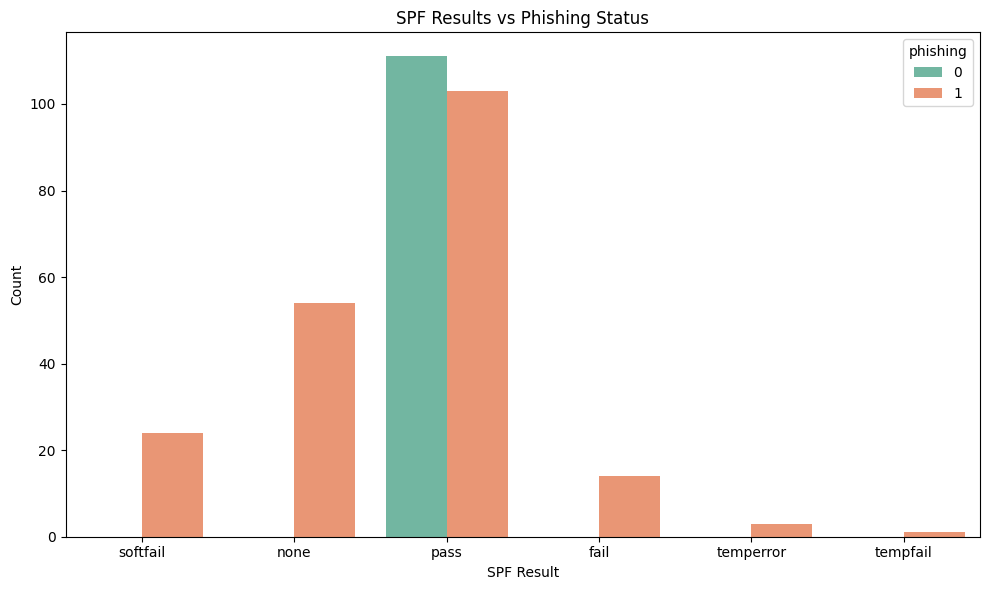

In [33]:

plt.figure(figsize=(10, 6))
sns.countplot(x='spf', hue='phishing', data=email_data, palette='Set2')
plt.title('SPF Results vs Phishing Status')
plt.xlabel('SPF Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


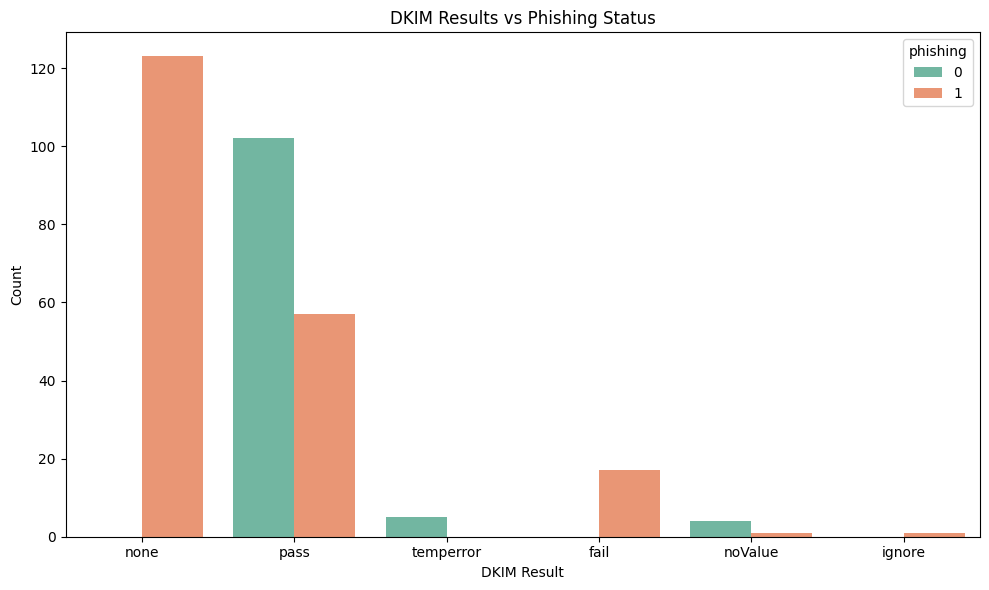

In [34]:

plt.figure(figsize=(10, 6))
sns.countplot(x='dkim', hue='phishing', data=email_data, palette='Set2')
plt.title('DKIM Results vs Phishing Status')
plt.xlabel('DKIM Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

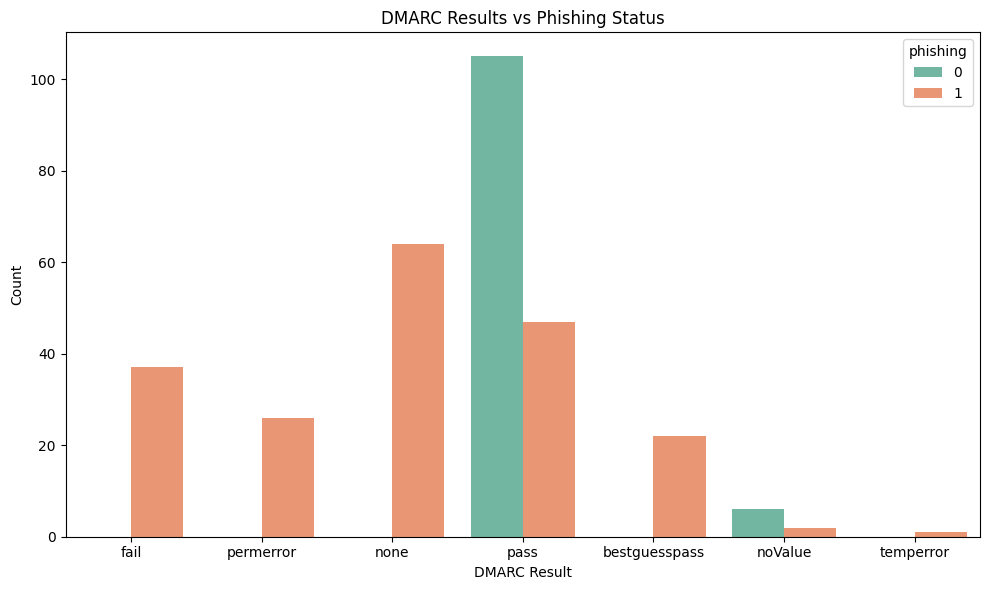

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='dmarc', hue='phishing', data=email_data, palette='Set2')
plt.title('DMARC Results vs Phishing Status')
plt.xlabel('DMARC Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

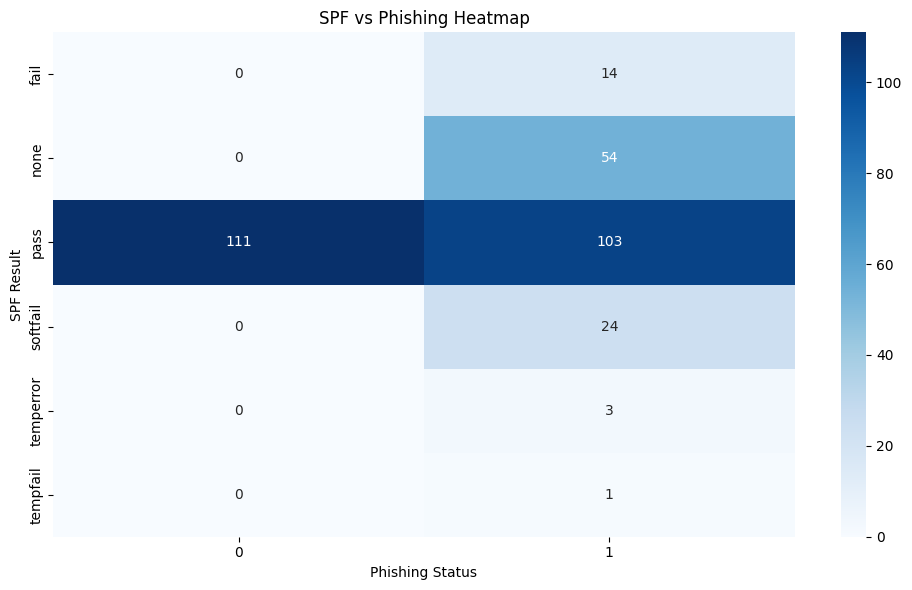

In [36]:

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(email_data['spf'], email_data['phishing']), annot=True, fmt='d', cmap='Blues')
plt.title('SPF vs Phishing Heatmap')
plt.xlabel('Phishing Status')
plt.ylabel('SPF Result')
plt.tight_layout()
plt.show()

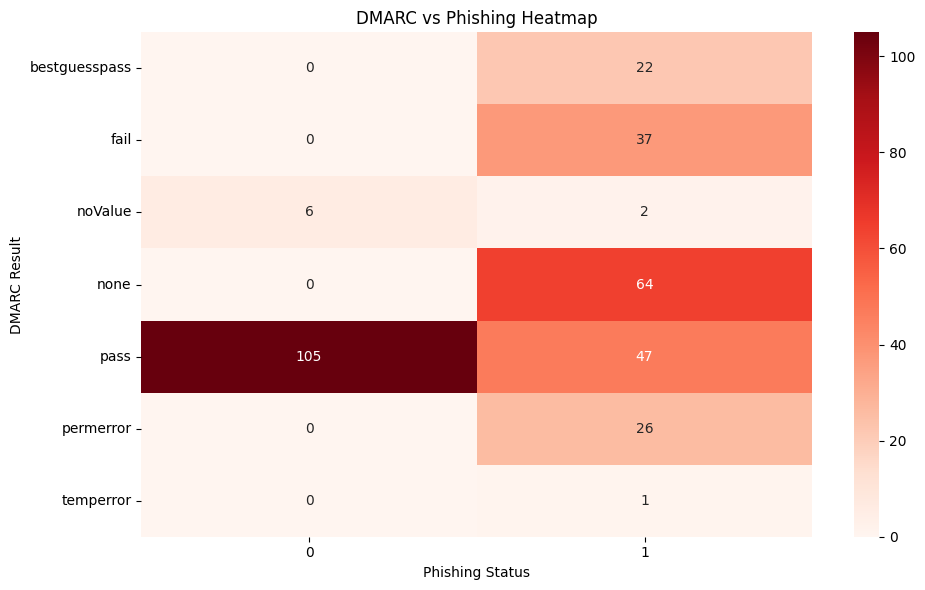

In [37]:


plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(email_data['dmarc'], email_data['phishing']), annot=True, fmt='d', cmap='Reds')
plt.title('DMARC vs Phishing Heatmap')
plt.xlabel('Phishing Status')
plt.ylabel('DMARC Result')
plt.tight_layout()
plt.show()


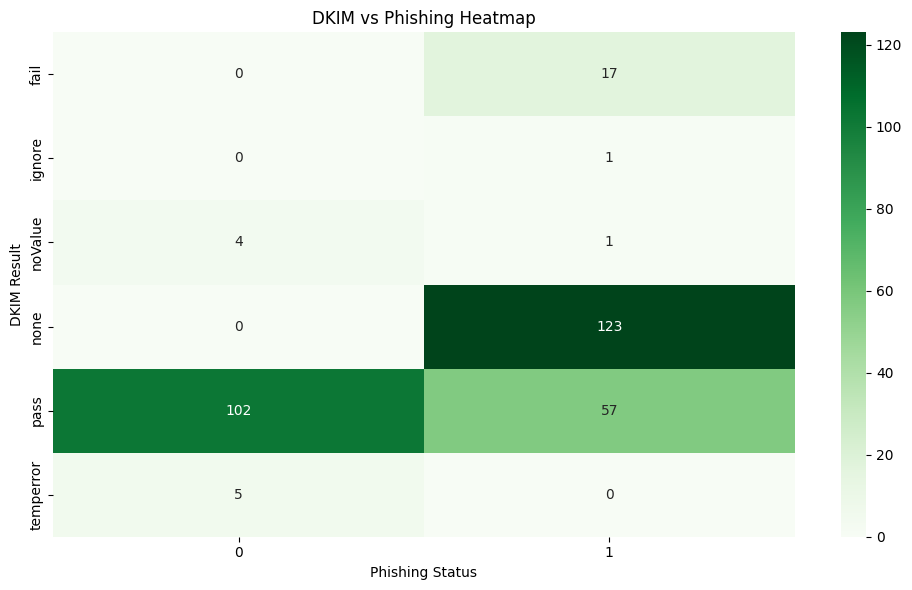

In [38]:

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(email_data['dkim'], email_data['phishing']), annot=True, fmt='d', cmap='Greens')
plt.title('DKIM vs Phishing Heatmap')
plt.xlabel('Phishing Status')
plt.ylabel('DKIM Result')
plt.tight_layout()
plt.show()

In [39]:
spf_count = email_data.groupby(['spf', 'phishing']).size().unstack(fill_value=0)
dkim_count = email_data.groupby(['dkim', 'phishing']).size().unstack(fill_value=0)
dmarc_count = email_data.groupby(['dmarc', 'phishing']).size().unstack(fill_value=0)
print(spf_count,dkim_count,dmarc_count)


phishing     0    1
spf                
fail         0   14
none         0   54
pass       111  103
softfail     0   24
temperror    0    3
tempfail     0    1 phishing     0    1
dkim               
fail         0   17
ignore       0    1
noValue      4    1
none         0  123
pass       102   57
temperror    5    0 phishing         0   1
dmarc                 
bestguesspass    0  22
fail             0  37
noValue          6   2
none             0  64
pass           105  47
permerror        0  26
temperror        0   1


In [40]:
combined_count = pd.DataFrame({
    'SPF (legitimate)': spf_count[0],
    'SPF (Phishing)': spf_count[1],
    'DKIM (legitimate)': dkim_count[0],
    'DKIM (Phishing)': dkim_count[1],
    'DMARC (legitimate)': dmarc_count[0],
    'DMARC (Phishing)': dmarc_count[1]
}).fillna(0)



In [41]:
combined_count = combined_count.T
print(combined_count)

                    bestguesspass  fail  ignore  noValue   none   pass  \
SPF (legitimate)              0.0   0.0     0.0      0.0    0.0  111.0   
SPF (Phishing)                0.0  14.0     0.0      0.0   54.0  103.0   
DKIM (legitimate)             0.0   0.0     0.0      4.0    0.0  102.0   
DKIM (Phishing)               0.0  17.0     1.0      1.0  123.0   57.0   
DMARC (legitimate)            0.0   0.0     0.0      6.0    0.0  105.0   
DMARC (Phishing)             22.0  37.0     0.0      2.0   64.0   47.0   

                    permerror  softfail  temperror  tempfail  
SPF (legitimate)          0.0       0.0        0.0       0.0  
SPF (Phishing)            0.0      24.0        3.0       1.0  
DKIM (legitimate)         0.0       0.0        5.0       0.0  
DKIM (Phishing)           0.0       0.0        0.0       0.0  
DMARC (legitimate)        0.0       0.0        0.0       0.0  
DMARC (Phishing)         26.0       0.0        1.0       0.0  


<Figure size 600x300 with 0 Axes>

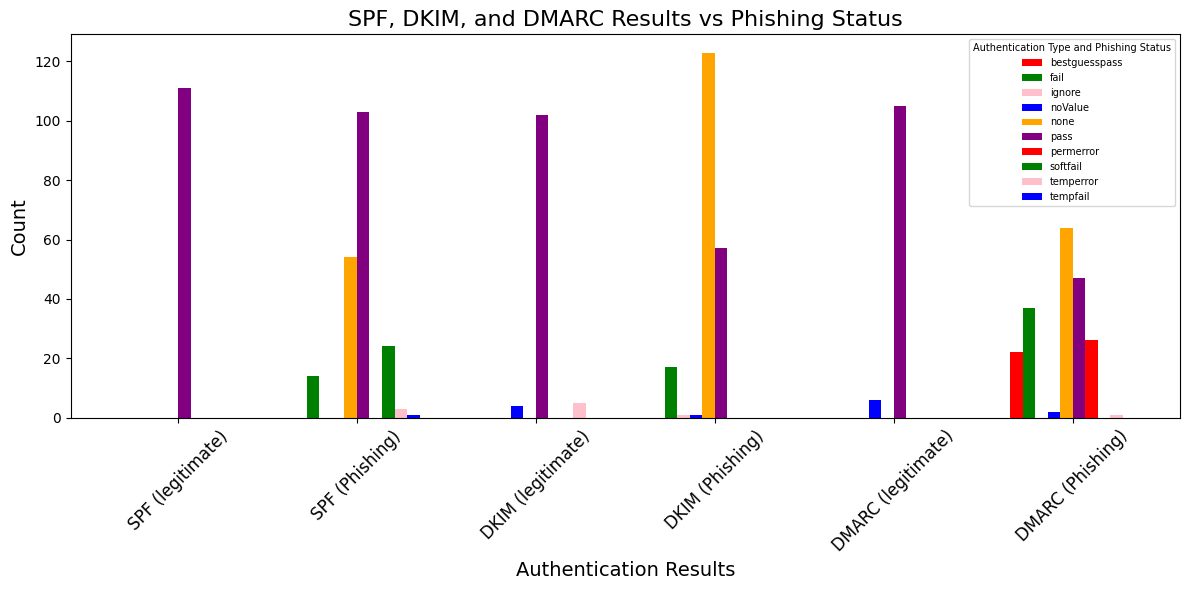

In [42]:
plt.figure(figsize=(6, 3))
combined_count.plot(
    kind='bar', 
    figsize=(12, 6), 
    width=0.7, 
    color=['red', 'green', 'pink', 'blue', 'orange', 'purple']
)

plt.title('SPF, DKIM, and DMARC Results vs Phishing Status', fontsize=16)
plt.xlabel('Authentication Results', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Authentication Type and Phishing Status', fontsize=7,title_fontsize=7)
plt.tight_layout()

plt.show()

In [43]:
from tabulate import tabulate

In [49]:
def performChiSquareTest(data, feature, target='phishing'):
    contingency_table = pd.crosstab(data[feature], data[target])
    # print(tabulate(contingency_table,headers='keys', tablefmt='psql'))
    chi, p_value, degree_of_freedom, expected_freq = chi2_contingency(contingency_table)
    
    return {
        'feature': feature,
        'chi_statistic': chi,
        'p_value': p_value,
        'degree_of_freedom': degree_of_freedom,
        'expected_frequencies': expected_freq,
        'contingency_table': contingency_table
    }


In [50]:
auth_features = ['spf', 'dkim', 'dmarc']

chi_square_results = {feature: performChiSquareTest(email_data, feature) for feature in auth_features}

chi_square_results_summary = {
    feature: {
        'chi_statistic': result['chi_statistic'],
        'p_value': result['p_value'],
        'degree_of_freedom': result['degree_of_freedom']
    }
    for feature, result in chi_square_results.items()
}

In [51]:
print(chi_square_results_summary)

{'spf': {'chi_statistic': np.float64(77.5691541821256), 'p_value': np.float64(2.704644311221641e-15), 'degree_of_freedom': 5}, 'dkim': {'chi_statistic': np.float64(147.43599862306604), 'p_value': np.float64(4.690405362425339e-30), 'degree_of_freedom': 5}, 'dmarc': {'chi_statistic': np.float64(162.22333216580768), 'p_value': np.float64(2.002143232183971e-32), 'degree_of_freedom': 6}}


/var/folders/ch/1z5q2pj16hx_dry25n86bm600000gn/T/ipykernel_62762/2771408641.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Phishing', 'Phishing'])
/var/folders/ch/1z5q2pj16hx_dry25n86bm600000gn/T/ipykernel_62762/2771408641.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Phishing', 'Phishing'])
/var/folders/ch/1z5q2pj16hx_dry25n86bm600000gn/T/ipykernel_62762/2771408641.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Phishing', 'Phishing'])


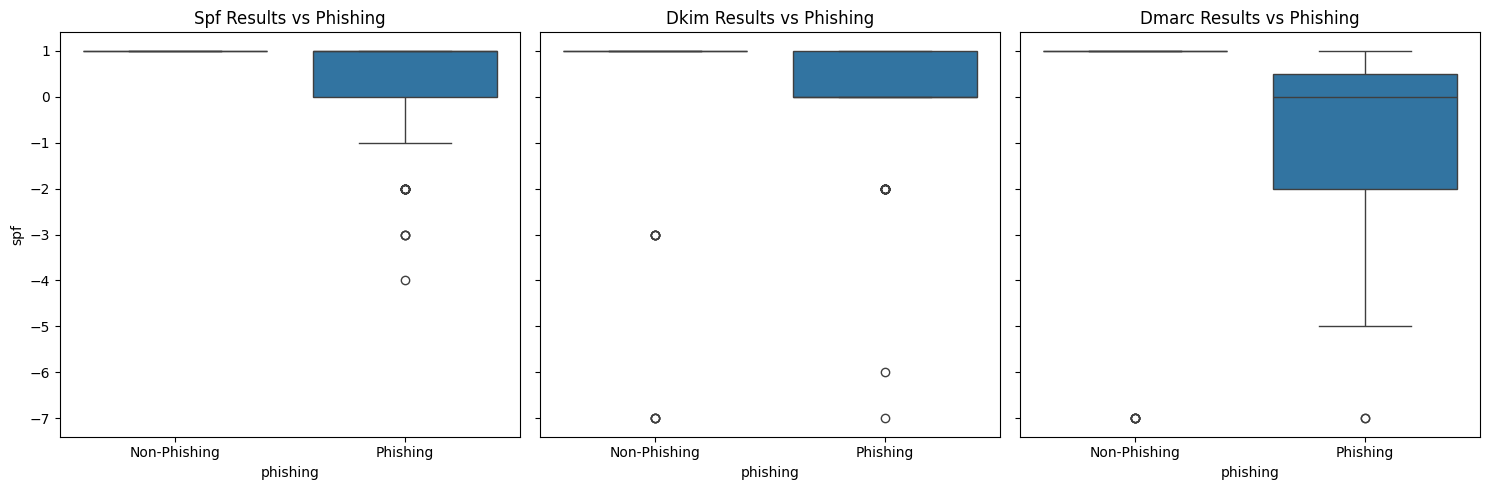

In [18]:
# Cleaning and summarizing authentication columns
authentication_columns = ['spf', 'dkim', 'dmarc']
email_data[authentication_columns].describe(include='all'), email_data[authentication_columns].value_counts()


# Encoding the categorical authentication columns
encoded_data = email_data.copy()
encoding_map = {
    'pass': 1, 'none': 0, 'softfail': -1, 'fail': -2, 
    'temperror': -3, 'tempfail': -4, 'permerror': -5, 'bestguesspass': 0.5,'ignore':-6,"noValue":-7
}
for col in authentication_columns:
    encoded_data[col] = encoded_data[col].map(encoding_map)

# Visualizing the distribution of authentication results for phishing and non-phishing emails
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, col in enumerate(authentication_columns):
    sns.boxplot(data=encoded_data, x='phishing', y=col, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} Results vs Phishing')
    axes[i].set_xticklabels(['Non-Phishing', 'Phishing'])

plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Preparing the dataset for modeling
features = encoded_data[authentication_columns]
target = encoded_data['phishing']

# Find columns with NaN values
columns_with_nan = email_data.columns[email_data.isna().any()].tolist()

# Print columns with NaN values
print("Columns with NaN values:", columns_with_nan)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

print(X_train)


# Training a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Making predictions
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

classification_rep, conf_matrix, roc_auc


Columns with NaN values: ['from', 'domain', 'sender_ip', 'x_sender_ip', 'return_path', 'domain_age', 'received-spf', 'total_forwarded_times']
     spf  dkim  dmarc
94   0.0   0.0    0.0
247  1.0   1.0    1.0
69   1.0  -7.0   -7.0
142  1.0   0.0    0.0
95   0.0   0.0    0.0
..   ...   ...    ...
186  0.0   0.0   -5.0
192  1.0   1.0    1.0
183 -2.0   0.0    0.0
128  1.0   1.0    1.0
23   0.0   0.0   -5.0

[217 rows x 3 columns]


('              precision    recall  f1-score   support\n\n           0       0.70      0.91      0.79        33\n           1       0.94      0.78      0.85        60\n\n    accuracy                           0.83        93\n   macro avg       0.82      0.85      0.82        93\nweighted avg       0.85      0.83      0.83        93\n',
 array([[30,  3],
        [13, 47]]),
 np.float64(0.8929292929292929))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [21]:
relevant_columns = ['spf', 'dkim', 'dmarc', 'phishing']
encoder = OneHotEncoder()
encoded_headers = encoder.fit_transform(email_data[['spf', 'dkim', 'dmarc']])
X = encoded_headers
y = email_data['phishing'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [22]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [23]:
y_pred = logistic_model.predict(X_test)
classification_results = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [24]:
print("Classification Report:")
print(classification_results)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        30
           1       1.00      0.81      0.89        63

    accuracy                           0.87        93
   macro avg       0.86      0.90      0.86        93
weighted avg       0.91      0.87      0.87        93

Confusion Matrix:
[[30  0]
 [12 51]]


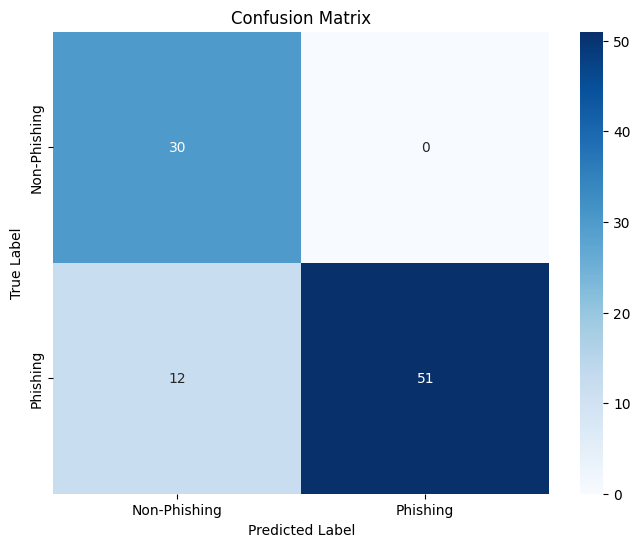

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

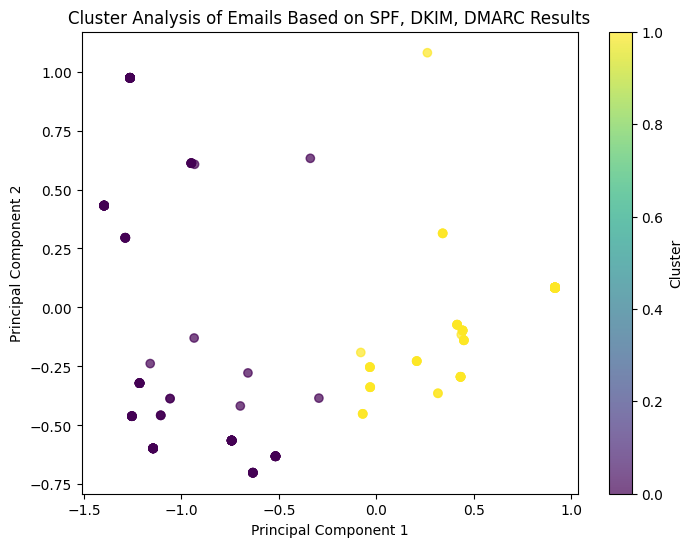

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("Cluster Analysis of Emails Based on SPF, DKIM, DMARC Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [28]:
email_data['cluster'] = clusters
cluster_summary = email_data.groupby('cluster')['phishing'].value_counts()
print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
cluster  phishing
0        1           130
1        0           111
         1            69
Name: count, dtype: int64


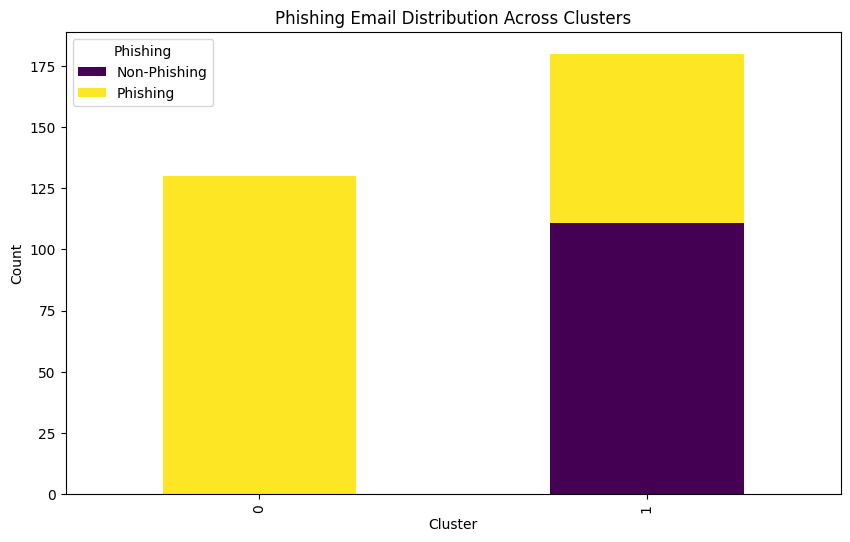

In [29]:
cluster_counts = email_data.groupby('cluster')['phishing'].value_counts().unstack()
cluster_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Phishing Email Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Phishing", labels=["Non-Phishing", "Phishing"])
plt.show()